<a href="https://colab.research.google.com/github/mrm8488/shared_colab_notebooks/blob/master/keras_ocr_custom_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras OCR
A packaged and flexible version of the CRAFT text detector and Keras CRNN recognition model

based on the project https://github.com/faustomorales/keras-ocr

> Colab by [mrm8488](https://twitter.com/mrm8488)
>> this version allows you to get images from your filesystem and/or an URL


In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
!pip install keras-ocr > /dev/null

In [0]:
import matplotlib.pyplot as plt
import keras_ocr
import os

In [5]:
# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [0]:
!mkdir uploads

## Upload files (images with text) form your local filesystem

In [83]:
# IMPORTANT! If the execution of this cell fails, JUST EXECUTE IT AGAIN!
from google.colab import files

uploaded = files.upload()
uploaded_files = list(uploaded.keys())
for uploaded_file in uploaded_files:
  print(uploaded_file)
  !mv $uploaded_file uploads/$uploaded_file

Saving acoustic-ml-min.png to acoustic-ml-min.png
Saving documentpdf.png to documentpdf.png
acoustic-ml-min.png
documentpdf.png


## Get the files from its URL (optional)

In [0]:
#@title Instert the URLs

url_1 = 'https://upload.wikimedia.org/wikipedia/commons/b/bd/Army_Reserves_Recruitment_Banner_MOD_45156284.jpg' #@param {type:"string"}
url_2 = '' #@param {type:"string"}
url_3 = '' #@param {type:"string"}

custom_urls = []
if(url_1 != ''): custom_urls.append(url_1)
if(url_2 != ''): custom_urls.append(url_2)
if(url_3 != ''): custom_urls.append(url_3)

In [0]:
![ -e /content/uploads/.ipynb_checkpoints ] && rm -rf /content/uploads/.ipynb_checkpoints

In [92]:
uploads_dir = "/content/uploads"
custom_images = []
images = []

for filename in os.listdir(uploads_dir):
    print(os.path.join(uploads_dir, filename))
    custom_images.append(os.path.join(uploads_dir, filename))


if(len(custom_images) > 0):
 images += [ keras_ocr.tools.read(path) for path in custom_images]


if(len(custom_urls) > 0):
  images += [ keras_ocr.tools.read(url) for url in custom_urls]

/content/uploads/acoustic-ml-min.png
/content/uploads/documentpdf.png


In [93]:
# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
%time predictions = pipeline.recognize(images)

CPU times: user 5.81 s, sys: 1.35 s, total: 7.16 s
Wall time: 7.19 s


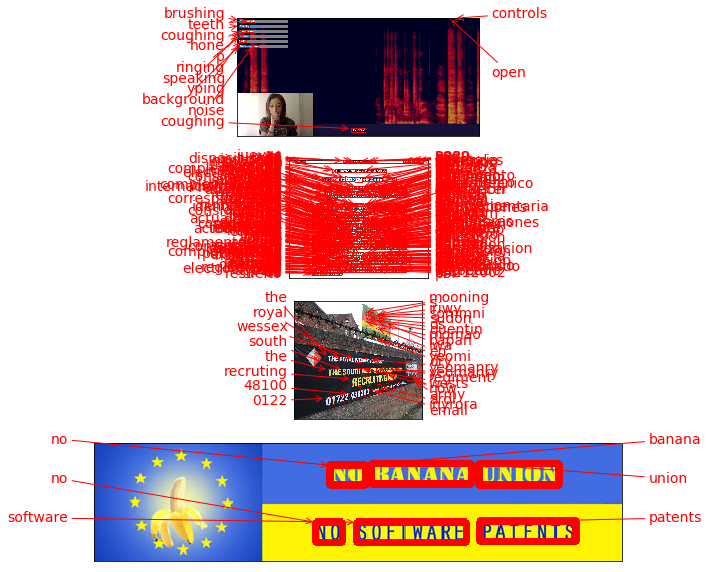

In [94]:
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 10))

if((len(custom_images) == 1 and len(custom_urls) == 0) or (len(custom_urls) == 1 and len(custom_images) == 0)):
  for image, prediction in zip(images, predictions):
    keras_ocr.tools.drawAnnotations(image=image, predictions=prediction, ax=axs)
else:
  for ax, image, prediction in zip(axs, images, predictions):
    keras_ocr.tools.drawAnnotations(image=image, predictions=prediction, ax=ax)

In [95]:
with open('results.txt', 'a+') as f:
  for idx, prediction in enumerate(predictions):
    if(idx != 0):
      print("\n")
      f.write("\n\n")
    print("Results for the file: " + os.path.basename(custom_images[idx]) if idx in range(0, len(custom_images)) else "Results for the file " +str(idx + 1) + " from URL")
    f.write("Results for the file: " + os.path.basename(custom_images[idx]) if idx in range(0, len(custom_images)) else "Results for the file " +str(idx + 1) + " from URL")
    f.write(":\n\n")
    for word, array in prediction:
      if word == "\n":
        print("\n")
        f.write("\n")
      else:
        print(word,  end = ' ')
        f.write(word + " ")

Results for the file: acoustic-ml-min.png
open controls brushing teeth coughing p hone ringing speaking yping background noise coughing 

Results for the file: documentpdf.png
num 14 jueves 16 2020 sec pag 3969 de de l enero disposiciones generales l ministerio de industria comercio y turismo 2020 direccion 612 resolucion de 9 de de de la general de industria de enero y la pequena mediana empresa actualiza el listado de la por que se normas y itcbto2 de instruccion tecnica complementaria del reglamento la electrotecnico baja tension aprobado el real decreto 84212002 de para por 2 de agosto considerando apartado del articulo 26 del reglamento electrotecnico ell 1 que para baja tension aprobado real decreto 84212002 de 2 de estipula agosio clas por que instrucciones tecnicas complementarias podran establecer aplicacion une la de normas otras reconocidas internacionalmente total parcial fin de facilitar de la manera u o a adaptacion estado tecnica cada al de la momento en dicha referencia

In [0]:
files.download("results.txt")